# Large Margin Classifier

In [136]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import hinge_loss
import matplotlib.pyplot as plt
%matplotlib inline

In [210]:
X = np.array([[0,0],[2,0],[3,0],[0,2],[2,2],[5,1],[5,2],[2,4],[4,4],[5,5]]) #10x2
y = np.array([-1, -1, -1, -1, -1, 1, 1, 1, 1, 1]).reshape(-1,1) # 10x1


clf_sgd = SGDClassifier(loss='hinge', penalty='l2', verbose=100, max_iter=100)

clf_sgd.fit(X,y)

-- Epoch 1
Norm: 49.55, NNZs: 2, Bias: -9.980100, T: 10, Avg. loss: 27.335063
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9.81, NNZs: 2, Bias: -29.704139, T: 20, Avg. loss: 14.978172
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 49.55, NNZs: 2, Bias: -29.675723, T: 30, Avg. loss: 5.060015
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 56.12, NNZs: 2, Bias: -49.055550, T: 40, Avg. loss: 27.587257
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 40.44, NNZs: 2, Bias: -68.231181, T: 50, Avg. loss: 22.214870
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 40.06, NNZs: 2, Bias: -77.700946, T: 60, Avg. loss: 16.214120
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 39.69, NNZs: 2, Bias: -87.064275, T: 70, Avg. loss: 15.022047
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 58.61, NNZs: 2, Bias: -87.072888, T: 80, Avg. loss: 6.709891
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 66.22, NNZs: 2, Bias: -96.349089, T: 90, Avg. loss: 6.422825
Total training

/home/abdu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/abdu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=100,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=100, warm_start=False)

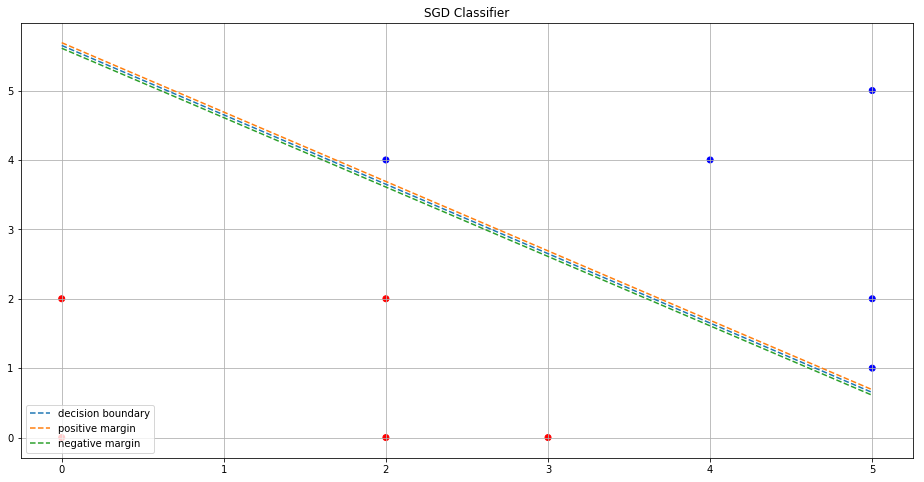

In [211]:
# Make Line Values from the decision boundary lines
x1s = np.linspace(min(X[:, 0]), max(X[:, 0]), 20)
x2s_sgd = (-clf_sgd.intercept_ - clf_sgd.coef_[0][0]*x1s)/clf_sgd.coef_[0][1]

# Visualize the decision boundary
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(X[:, 0], X[:, 1], color=["r" if y1 == -1 else "b" for y1 in y])
ax.plot(x1s, x2s_sgd, linestyle="--", label="decision boundary")

ax.plot(x1s, (1-clf_sgd.intercept_ - clf_sgd.coef_[0][0]*x1s)/clf_sgd.coef_[0][1], linestyle="--", label="positive margin")
ax.plot(x1s, (-1-clf_sgd.intercept_ - clf_sgd.coef_[0][0]*x1s)/clf_sgd.coef_[0][1], linestyle="--", label="negative margin")
plt.grid()
ax.legend(loc="lower left")
plt.title('SGD Classifier')
plt.show()

In [171]:
clf_sgd.coef_

array([[0.73228672, 0.54921504]])

In [172]:
clf_sgd.intercept_

array([-3.85566376])

In [173]:
X = np.array([[0,0],[2,0],[3,0],[0,2],[2,2],[5,1],[5,2],[2,4],[4,4],[5,5]]) #10x2
y = np.array([-1, -1, -1, -1, -1, 1, 1, 1, 1, 1]).reshape(-1,1) # 10x1

theta0 = 0
theta = np.array([0, 0]).reshape(-1,1) # 2x1

# Make and fit my SVM with low `C`
svm_bias = LinearSVC(loss="hinge", C=1.0)
svm_bias.fit(X, y)

# Make and fit my SVM with low `C`
svm_variance = LinearSVC(loss="hinge", C=1000)
svm_variance.fit(X, y)

/home/abdu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abdu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abdu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1000, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

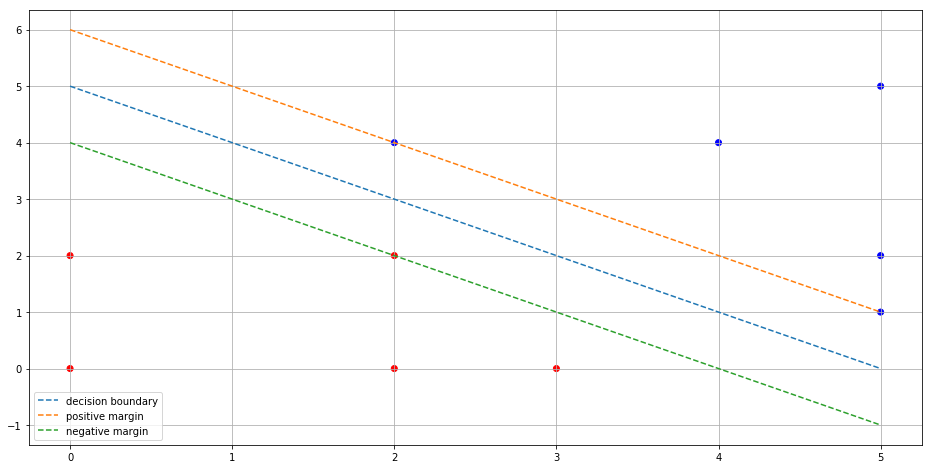

In [152]:
# Make Line Values from the decision boundary lines
x1s = np.linspace(min(X[:, 0]), max(X[:, 0]), 20)
#x2s_bias = (-svm_bias.intercept_ - svm_bias.coef_[0][0]*x1s)/svm_bias.coef_[0][1]
x2s_variance = (-svm_variance.intercept_ - svm_variance.coef_[0][0]*x1s)/svm_variance.coef_[0][1]

# Visualize the decision boundary
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(X[:, 0], X[:, 1], color=["r" if y1 == -1 else "b" for y1 in y])
#ax.plot(x1s, x2s_bias, linestyle="--", label="low C, high bias")
ax.plot(x1s, x2s_variance, linestyle="--", label="decision boundary")



ax.plot(x1s, (1-svm_variance.intercept_ - svm_variance.coef_[0][0]*x1s)/svm_variance.coef_[0][1], linestyle="--", label="positive margin")
ax.plot(x1s, (-1-svm_variance.intercept_ - svm_variance.coef_[0][0]*x1s)/svm_variance.coef_[0][1], linestyle="--", label="negative margin")
plt.grid()
ax.legend(loc="lower left")
plt.show()